In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Load the dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace=True,header=None)
dataset = dataframe.values
X_train = dataset[:400,0:13]
Y_train = dataset[:400,13]
X_test = dataset[401:,0:13]
Y_test = dataset[401:,13]


Using TensorFlow backend.
/home/gautham/singularity/env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
##define base model
def base_model():
     model = Sequential()
     model.add(Dense(14, input_dim=13, init='normal', activation='relu'))
     model.add(Dense(256, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

seed = 7
np.random.seed(seed)

In [3]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
clf.fit(X_test,Y_test)


/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", input_dim=13, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


In [4]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(Y_test, clf.predict(X_test))
score = mean_absolute_error(Y_train, clf.predict(X_train))
score


11.83689216184616

In [6]:
scores=[]
scores2=[]
v=[]
for i in range(1,50,1):
    ##define base model
    def base_model():
        model = Sequential()
        model.add(Dense(14, input_dim=13, init='normal', activation='relu'))
        model.add(Dense(i, init='normal', activation='relu'))
        model.add(Dense(1, init='normal'))
        model.compile(loss='mean_squared_error', optimizer = 'adam')
        return model
    seed = 7
    np.random.seed(seed)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.fit_transform(X_test)
    clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
    clf.fit(X_test,Y_test)
    from sklearn.metrics import mean_absolute_error
    score = mean_absolute_error(Y_test, clf.predict(X_test))
    scores.append(score)
    v.append(i)
    score = mean_absolute_error(Y_train, clf.predict(X_train))
    scores2.append(score)

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", input_dim=13, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="normal")`
/ho

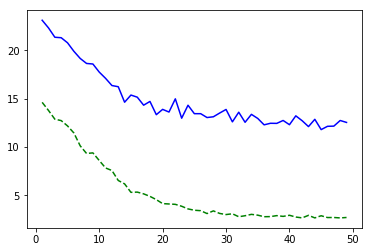

In [7]:
import matplotlib.pyplot as plt
plt.plot(v,scores,'g--')
plt.plot(v,scores2,'b')
plt.show()

In [12]:
import time
import keras
from sklearn.metrics import mean_absolute_error
times = []
scores=[]
scores2=[]
v=[]
for i in range(0,30):
    def base_model():
        model = Sequential()
        model.add(Dense(14, input_dim=13, init='normal', activation='relu'))
        model.add(Dense(10, init='normal', activation='relu'))
        model.add(Dense(1, init='normal'))
        adam = keras.optimizers.Adam(lr=i/1000, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(loss='mean_squared_error', optimizer = adam)
        return model
    seed = 7
    np.random.seed(seed)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.fit_transform(X_test)
    epoch_time_start = time.time()
    clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
    clf.fit(X_test,Y_test)
    times.append(time.time() - epoch_time_start)
    score = mean_absolute_error(Y_test, clf.predict(X_test))
    scores.append(score)
    v.append(i)
    score = mean_absolute_error(Y_train, clf.predict(X_train))
    scores2.append(score)
    scores2

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", input_dim=13, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


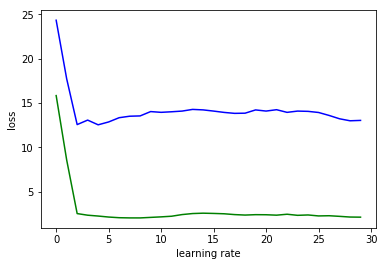

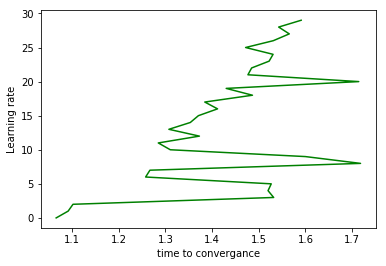

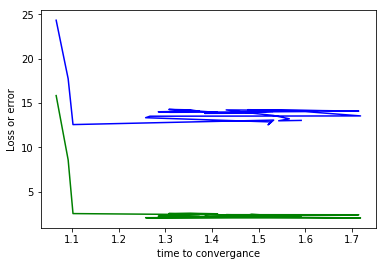

In [14]:
import matplotlib.pyplot as plt
plt.plot(v,scores,'g')
plt.plot(v,scores2,'b')
plt.ylabel('loss')
plt.xlabel('learning rate')
plt.show()
plt.plot(times,v,'g')
plt.ylabel('Learning rate')
plt.xlabel('time to convergance')
plt.show()
plt.plot(times,scores,'g')
plt.plot(times,scores2,'b')
plt.ylabel('Loss or error')
plt.xlabel('time to convergance')
plt.show()